In [1]:
import pandas as pd
import numpy as np
from os.path import join

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
plt.style.use('CCB_plot_style_0v4.mplstyle')
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']   


from sklearn import linear_model
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.linear_model import LinearRegression


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution


## 1. Using the Codon Adaptation Index (CAI) to predict kcat

#### (a) Loading CAI values for genes in Escherichia coli (Calculated by Xiao-Pan Hu):

In [2]:
CAI_df = pd.read_csv(join("..", "..", "data", "enzyme_data", "Ecoli_CAI.txt"), sep = "\t")
CAI_df

,bnumber,GeneName,UniProtID,CAI
0,b0001,thrL,P0AD86,0.6438
1,b0002,thrA,P00561,0.3985
2,b0003,thrB,P00547,0.3877
3,b0004,thrC,P00934,0.4388
4,b0005,yaaX,P75616,0.3969
...,...,...,...,...
4281,b4399,creC,P08401,0.3350
4282,b4400,creD,P08369,0.3179
4283,b4401,arcA,P0A9Q1,0.5787
4284,b4402,yjjY,P0ADD9,0.3652


#### (b) Loading kcat values and mapping the CAI to all data points if possible

In [3]:
data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat.pkl"))

data_train["Uniprot ID"] = [UID[0] for UID in data_train["Uniprot IDs"]]
data_test["Uniprot ID"] = [UID[0] for UID in data_test["Uniprot IDs"]]

data_train.rename(columns = {"geomean_kcat" :"log10_kcat"}, inplace = True)
data_test.rename(columns = {"geomean_kcat" :"log10_kcat"}, inplace = True)

In [4]:
data_train["CAI"] = np.nan

for ind in data_train.index:
    UID = data_train["Uniprot ID"][ind]
    help_df = CAI_df.loc[CAI_df["UniProtID"] == UID]
    if len(help_df):
        data_train["CAI"][ind] = list(help_df["CAI"])[0]
        
        
data_test["CAI"] = np.nan

for ind in data_test.index:
    UID = data_test["Uniprot ID"][ind]
    help_df = CAI_df.loc[CAI_df["UniProtID"] == UID]
    if len(help_df):
        data_test["CAI"][ind] = list(help_df["CAI"])[0]

C:\Users\alexk\anaconda3\envs\Predicting_Km\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\alexk\anaconda3\envs\Predicting_Km\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


#### (c) Plotting the CAI versus the kcat values

##### (c)(i) training set:

237


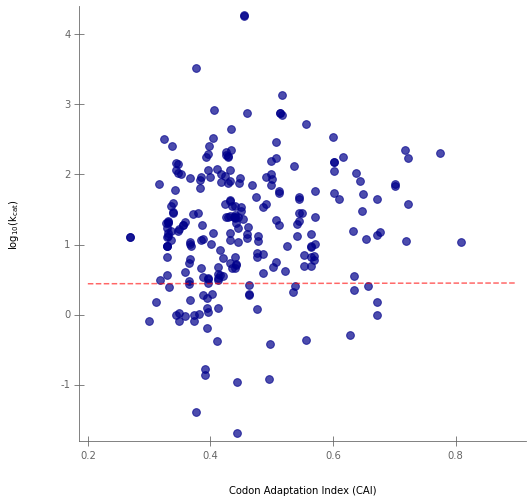

In [5]:
cai = np.array(data_train["CAI"].loc[~pd.isnull(data_train["CAI"])])
kcat = np.array(data_train["log10_kcat"].loc[~pd.isnull(data_train["CAI"])])
print(len(cai))


fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)


x0,x1,y0,y1 = 0.2, 0.9, -2, 5
reg = LinearRegression().fit(kcat.reshape(-1,1), cai.reshape(-1,1),)
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
#plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed')
plt.plot([x0, x1], [beta0 + x0*beta1, beta0 + x1*beta1], color='red', alpha = 0.6, linestyle='dashed')


plt.xlabel("Codon Adaptation Index (CAI)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(cai,  kcat, alpha = 0.7, s=60, c= "darkblue")
plt.show()

##### (c)(ii) test set

66


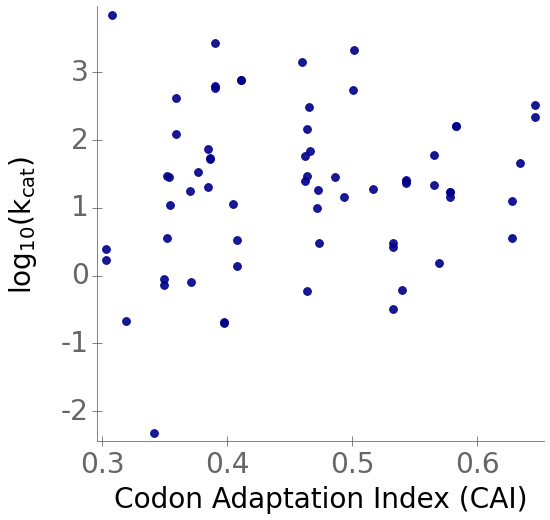

In [6]:
cai = np.array(data_test["CAI"].loc[~pd.isnull(data_test["CAI"])])
kcat = np.array(data_test["log10_kcat"].loc[~pd.isnull(data_test["CAI"])])
print(len(cai))


fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)


plt.xlabel("Codon Adaptation Index (CAI)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(cai,  kcat, alpha = 0.9, s=60, c= "darkblue")
plt.show()

##### (c)(iii) training and test set:

303


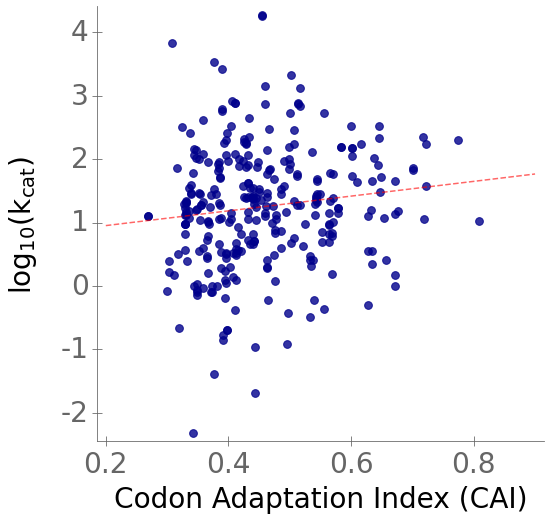

In [7]:
data = pd.concat([data_train, data_test])
cai = np.array(data["CAI"].loc[~pd.isnull(data["CAI"])])
kcat = np.array(data["log10_kcat"].loc[~pd.isnull(data["CAI"])])
print(len(cai))


fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

x0,x1,y0,y1 = 0.2, 0.9, -2, 5
reg = LinearRegression().fit(cai.reshape(-1,1), kcat.reshape(-1,1),)
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
#plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed')
plt.plot([x0, x1], [beta0 + x0*beta1, beta0 + x1*beta1], color='red', alpha = 0.6, linestyle='dashed')

plt.xlabel("Codon Adaptation Index (CAI)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(cai,  kcat, alpha = 0.8, s=60, c= "darkblue")
plt.savefig(join("..","..", "data", "figures", "CAI.png"))
plt.show()

#### (d) Fitting a linear regression model:

In [8]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
cai = np.array(data_train["CAI"].loc[~pd.isnull(data_train["CAI"])])
kcat = np.array(data_train["log10_kcat"].loc[~pd.isnull(data_train["CAI"])])
regr.fit(np.reshape(np.array(cai), (-1,1)), np.array(kcat))
print("Train set R²: %s" % r2_score(kcat, regr.predict(np.reshape(np.array(cai), (-1,1)))))

cai = np.array(data_test["CAI"].loc[~pd.isnull(data_test["CAI"])])
kcat = np.array(data_test["log10_kcat"].loc[~pd.isnull(data_test["CAI"])])
test_Y = kcat
y_test_pred =regr.predict(np.reshape(np.array(cai), (-1,1)))
print("Test set R²")
MSE_dif_fp_test = np.mean(abs(np.reshape(test_Y, (-1)) - y_test_pred)**2)
R2_dif_fp_test = r2_score(np.reshape(test_Y, (-1)), y_test_pred)
Pearson = stats.pearsonr(np.reshape(test_Y, (-1)), y_test_pred)
print("Person: %s, MSE: %s, R²: %s" %(Pearson[0], MSE_dif_fp_test, R2_dif_fp_test))

Train set R²: 0.016651316572091956
Test set R²
Person: 0.1225352429669883, MSE: 1.3100937255922593, R²: 0.011906311677939319


## 2. Using the Michaelis constant KM to predict kcat

#### (a) Loading an preprocessing data:

In [9]:
data_train = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_with_KM.pkl"))
data_test = pd.read_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_with_KM.pkl"))

Calculation one kcat value for every data point (either mean/median/max?)

In [10]:
data_train["KM"] = [np.mean(KMs) for KMs in data_train["KM values"]]
data_test["KM"] = [np.mean(KMs) for KMs in data_test["KM values"]]

#### (b) Plotting the KM versus the kcat

##### (b)(i) training set

3421


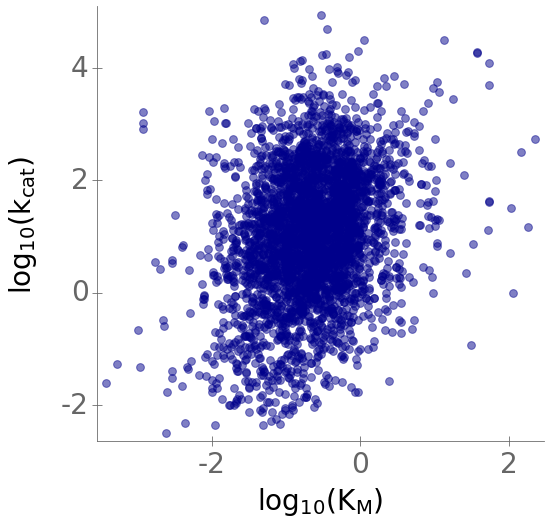

In [11]:
km = np.array(data_train["KM"].loc[~pd.isnull(data_train["KM"])])
kcat = np.array(data_train["log10_kcat"].loc[~pd.isnull(data_train["KM"])])
print(len(km))

fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)



plt.xlabel("$\log_{10}$($K_{M}$)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(km,  kcat, alpha = 0.5, s=60, c= "darkblue")

plt.show()

##### (b)(ii) test set

850


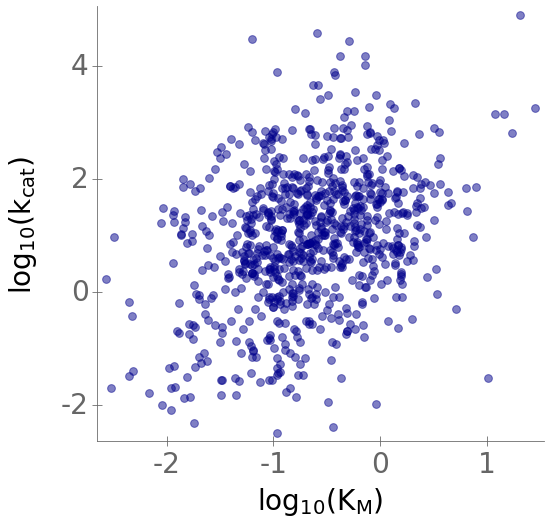

In [12]:
km = np.array(data_test["KM"].loc[~pd.isnull(data_test["KM"])])
kcat = np.array(data_test["log10_kcat"].loc[~pd.isnull(data_test["KM"])])
print(len(km))

fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)


plt.xlabel("$\log_{10}$($K_{M}$)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(km,  kcat, alpha = 0.5, s=60, c= "darkblue")
plt.show()

##### (b)(iii) training and test set

4271


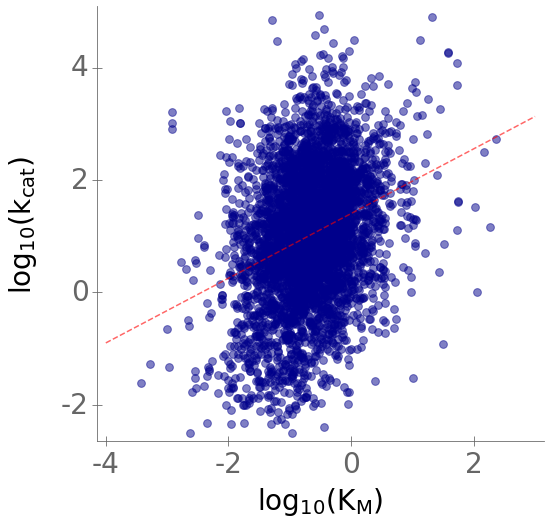

In [13]:
data = pd.concat([data_test, data_train], ignore_index=True)

km = np.array(data["KM"].loc[~pd.isnull(data["KM"])])
kcat = np.array(data["log10_kcat"].loc[~pd.isnull(data["KM"])])
print(len(km))

fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

x0,x1,y0,y1 = -4, 3, -3, 5
reg = LinearRegression().fit(km.reshape(-1,1), kcat.reshape(-1,1),)
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
#plt.plot([-3.5,4.9], [-3.5,4.9], color='grey', alpha = 0.3, linestyle='dashed')
plt.plot([x0, x1], [beta0 + x0*beta1, beta0 + x1*beta1], color='red', alpha = 0.6, linestyle='dashed')

plt.xlabel("$\log_{10}$($K_{M}$)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(km,  kcat, alpha = 0.5,s=60, c= "darkblue")
plt.savefig(join("..","..", "data", "figures", "KM.png"))

plt.show()

#### (c) Fitting a linear regression model:

In [14]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
km = np.array(data_train["KM"].loc[~pd.isnull(data_train["KM"])])
kcat = np.array(data_train["log10_kcat"].loc[~pd.isnull(data_train["KM"])])
regr.fit(np.reshape(np.array(km), (-1,1)), np.array(kcat))
print("Train set R²: %s" % r2_score(kcat, regr.predict(np.reshape(np.array(km), (-1,1)))))

km = np.array(data_test["KM"].loc[~pd.isnull(data_test["KM"])])
kcat = np.array(data_test["log10_kcat"].loc[~pd.isnull(data_test["KM"])])
test_Y = kcat
y_test_pred =regr.predict(np.reshape(np.array(km), (-1,1)))
print("Test set R²")
MSE_dif_fp_test = np.mean(abs(np.reshape(test_Y, (-1)) - y_test_pred)**2)
R2_dif_fp_test = r2_score(np.reshape(test_Y, (-1)), y_test_pred)
Pearson = stats.pearsonr(np.reshape(test_Y, (-1)), y_test_pred)
print("Person: %s, MSE: %s, R²: %s" %(Pearson[0], MSE_dif_fp_test, R2_dif_fp_test))

Train set R²: 0.08365654070717021
Test set R²
Person: 0.33731871788217327, MSE: 1.276804769306796, R²: 0.10935311537049752


## 3. Using predicted fluxes to predict kcat

#### (a) Mapping fluxes to training and test set:

In [15]:
df_kcat = pd.read_pickle(join("..", "..", "data", "kcat_data",
                         "df_kcat_with_fluxes.pkl"))

In [16]:
data_train["flux"] = np.nan
for ind in data_train.index:
    r_ID, seq_ID = data_train["Reaction ID"][ind], data_train["Sequence ID"][ind]
    help_df = df_kcat.loc[df_kcat["Reaction ID"] == r_ID].loc[df_kcat["Sequence ID"] == seq_ID]
    data_train["flux"][ind] = list(help_df["flux"])[0]

data_test["flux"] = np.nan
for ind in data_test.index:
    r_ID, seq_ID = data_test["Reaction ID"][ind], data_test["Sequence ID"][ind]
    help_df = df_kcat.loc[df_kcat["Reaction ID"] == r_ID].loc[df_kcat["Sequence ID"] == seq_ID]
    data_test["flux"][ind] = list(help_df["flux"])[0]
    

C:\Users\alexk\anaconda3\envs\Predicting_Km\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\alexk\anaconda3\envs\Predicting_Km\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


#### (b) Ploting data from training an test set:

4271


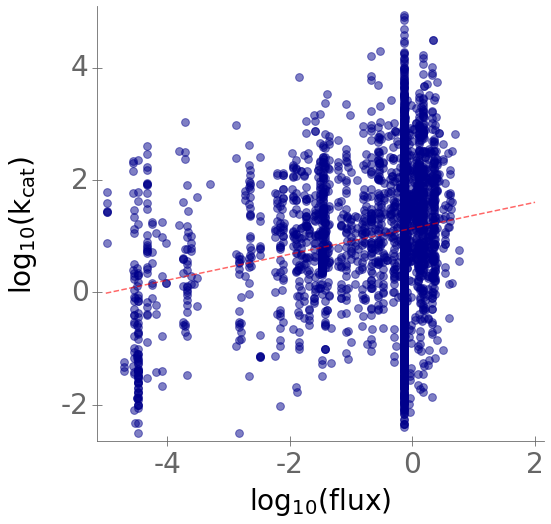

In [17]:
data = pd.concat([data_test, data_train], ignore_index=True)

flux = np.log10(np.array(data["flux"].loc[~pd.isnull(data["flux"])])+1e-5)
kcat = np.array(data["log10_kcat"].loc[~pd.isnull(data["flux"])])
print(len(flux))

fig, ax = plt.subplots(figsize= (8,8))
plt.rcParams.update({'font.size': 28})


ax.tick_params(axis='x', length=10)
ax.tick_params(axis='y', length=10)
ax.yaxis.set_label_coords(-0.13, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

x0,x1,y0,y1 = -5, 2, -2.5, 5
reg = LinearRegression().fit(flux.reshape(-1,1), kcat.reshape(-1,1),)
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]
plt.plot([x0, x1], [beta0 + x0*beta1, beta0 + x1*beta1], color='red', alpha = 0.6, linestyle='dashed')

plt.xlabel("$\log_{10}$($flux$)")
plt.ylabel("$\log_{10}$($k_{cat}$)")
plt.scatter(flux,  kcat, alpha = 0.5, s=60, c= "darkblue")
plt.savefig(join("..","..", "data", "figures", "flux.png"))
plt.show()

#### (c) Fitting a linear regression model:

In [18]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
flux = np.array(data_train["flux"].loc[~pd.isnull(data_train["flux"])])
kcat = np.array(data_train["log10_kcat"].loc[~pd.isnull(data_train["flux"])])
regr.fit(np.reshape(np.array(flux), (-1,1)), np.array(kcat))
print("Train set R²: %s" % r2_score(kcat, regr.predict(np.reshape(np.array(flux), (-1,1)))))

flux = np.array(data_test["flux"].loc[~pd.isnull(data_test["flux"])])
kcat = np.array(data_test["log10_kcat"].loc[~pd.isnull(data_test["flux"])])
test_Y = kcat
y_test_pred =regr.predict(np.reshape(np.array(flux), (-1,1)))
print("Test set R²")
MSE_dif_fp_test = np.mean(abs(np.reshape(test_Y, (-1)) - y_test_pred)**2)
R2_dif_fp_test = r2_score(np.reshape(test_Y, (-1)), y_test_pred)
Pearson = stats.pearsonr(np.reshape(test_Y, (-1)), y_test_pred)
print("Person: %s, MSE: %s, R²: %s" %(Pearson[0], MSE_dif_fp_test, R2_dif_fp_test))

Train set R²: 0.018666960481954264
Test set R²
Person: 0.15216832051145787, MSE: 1.4038709461507926, R²: 0.020716937570715466


In [19]:
data_train.to_pickle(join("..", "..", "data", "kcat_data", "splits", "train_df_kcat_with_KM_and_flux.pkl"))
data_test.to_pickle(join("..", "..", "data", "kcat_data", "splits", "test_df_kcat_with_KM_and_flux.pkl"))